In [1]:
import pickle as pkl
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

plt.style.use(['science','no-latex'])

In [7]:
def readRes(parameter="beta", model="gnn", diff="SIR"):
    res_path = "../data/er_parameter/{}_{}_{}_results.pkl".format(parameter, diff, model)
    with open(res_path, "rb") as f:
        res = pkl.load(f)
    model_res = [x[0] for x in res]
    dmp_res = [x[1] for x in res]
    return model_res, dmp_res

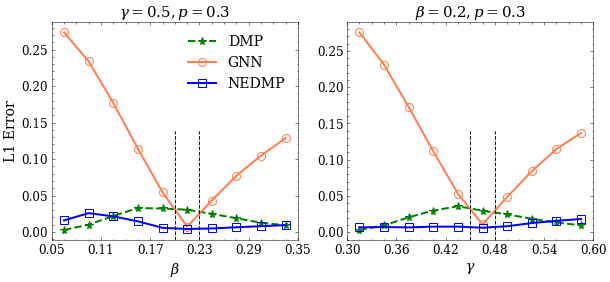

In [20]:
plt.figure(figsize=(15, 4))
fs = 12
lw = 2
nt = 6

# BETA

gnn, dmp = readRes(parameter="beta", model="gnn", diff="SIR")
nedmp, dmp = readRes(parameter="beta", model="nedmp", diff="SIR")
    
beta_gnn_g = [x[0] for x in gnn]
beta_dmp = [x[0] for x in dmp]
beta_nedmp_g = [x[0] for x in nedmp]
    
ax1 = plt.subplot(131)
x = (np.linspace(0.05, 0.35, 11)+0.015)[:10]
ax1.plot(x, beta_dmp,"--", lw=lw, marker="*", markersize=8, label="DMP", c="g")
ax1.plot(x, beta_gnn_g, lw=lw, marker="o", markerfacecolor='none', markersize=8,label="GNN", c="coral")
ax1.plot(x, beta_nedmp_g, lw=lw, marker="s", markerfacecolor='none', markersize=8,label="NEDMP", c="b")

ticks = ["{:.2f}".format(x) for x in np.linspace(0.05, 0.35,nt)]
ax1.set_xticks(np.linspace(0.05, 0.35, nt))
ax1.set_xticklabels(ticks, fontsize=fs)
ax1.legend(fontsize=fs+2, loc="upper right")
ax1.set_xlabel(r"$\beta$", fontsize=fs+2)
ax1.set_ylabel("L1 Error", fontsize=fs+2)
ax1.yaxis.set_tick_params(labelsize=fs)
ax1.set_title(r"$\gamma=0.5, p=0.3$", fontsize=fs+3)
ax1.axvline(0.2, ymax=0.5, ls="--", c="k", alpha=0.9)
ax1.axvline(0.23, ymax=0.5, ls="--", c="k", alpha=0.9)

# GAMMA
gnn, dmp = readRes(parameter="gamma", model="gnn", diff="SIR")
nedmp, dmp = readRes(parameter="gamma", model="nedmp", diff="SIR")
gamma_gnn_g = [x[0] for x in gnn]
gamma_dmp = [x[0] for x in dmp]
gamma_nedmp_g = [x[0] for x in nedmp] 
ax2 = plt.subplot(132)
x = (np.linspace(0.3, 0.6, 11)+0.015)[:10]
ax2.plot(x, gamma_dmp,"--", lw=lw, marker="*", markersize=8, label="DMP", c="g")
ax2.plot(x, gamma_gnn_g, lw=lw, marker="o", markerfacecolor='none',label="node-GNN", markersize=8, c="coral")
ax2.plot(x, gamma_nedmp_g, lw=lw, marker="s", markerfacecolor='none',label="NEDMP", markersize=8, c="b")

ticks = ["{:.2f}".format(x) for x in np.linspace(0.3, 0.6, nt)]
ax2.set_xticks(np.linspace(0.3, 0.6, nt))
ax2.set_xticklabels(ticks, fontsize=fs)
# ax2.legend(fontsize=fs+2, loc="upper right")
ax2.set_xlabel(r"$\gamma$", fontsize=fs+2)
ax2.yaxis.set_tick_params(labelsize=fs)
ax2.set_title(r"$\beta=0.2, p=0.3$", fontsize=fs+3)
ax2.axvline(0.45, ymax=0.5, ls="--", c="k", alpha=0.9)
ax2.axvline(0.48, ymax=0.5, ls="--", c="k", alpha=0.9)


# # Seed 
# ax3 = plt.subplot(133)
# x = np.linspace(2, 11, 10)
# ax3.plot(x, beta_dmp,"--", lw=lw)

# ax3.plot(x, beta_gnn_g, lw=lw, marker="o", markerfacecolor='none',label="node-GNN", markersize=8, c="coral")
# # ax3.plot(x, beta_lgnn_g, lw=lw, marker="^", markerfacecolor='none',label="edge-LGNN", markersize=8, c="gray")
# ax3.plot(x, beta_nedmp_g, lw=lw, marker="s", markerfacecolor='none',label="NEDMP", markersize=8, c="g")

# ax3.plot([2, 11], [0, 0], "--k")

# ticks = ["{:.0f}".format(x) for x in np.linspace(2, 11, 10)]
# ax3.set_xticks(np.linspace(2, 11, 10))
# ax3.set_xticklabels(ticks, fontsize=fs)
# # ax3.legend(fontsize=fs+2, loc="upper right")
# ax3.set_xlabel(r"$Seed$", fontsize=fs+2)
# ax3.yaxis.set_tick_params(labelsize=fs)
# ax3.ticklabel_format(style='scientific', scilimits=(1,2), axis='y')
# ax3.set_title(r"$\beta=0.1, \gamma=0.35, N=50$", fontsize=fs+3)
# ax3.axvline(7.5, ymax=0.5, ls="--", c="k", alpha=0.5)
# ax3.axvline(6.5, ymax=0.5, ls="--", c="k", alpha=0.5)


plt.savefig("er_outset_parameter.pdf", bbox_inches='tight')
plt.show()

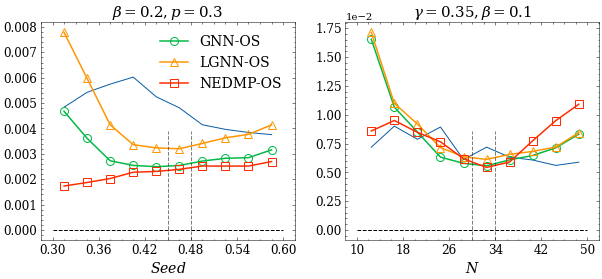

In [16]:
plt.figure(figsize=(10, 4))
fs = 12
lw = 1.5
nt = 6 

# GAMMA
data_names = ["seed{}".format(i) for i in range(10)]
beta_dmp, beta_gnn, beta_lgnn, beta_nedmp = [], [], [], []
for name in data_names:
    d, gnn = readParameter(data_name=name, model_name="gnn", suffix="", metric="all")
    d, lgnn = readParameter(data_name=name, model_name="lgnn", suffix="", metric="all")
    d, nedmp = readParameter(data_name=name, model_name="nedmp", suffix="", metric="all")
    
    beta_dmp.append(d)
    beta_gnn.append(gnn)
    beta_lgnn.append(lgnn)
    beta_nedmp.append(nedmp)
    
beta_gnn_g, beta_lgnn_g, beta_nedmp_g = [], [], []
for name in data_names:
    _, gnn = readParameter(data_name=name, model_name="gnn", suffix="_basedOnSeed5", metric="all")
    _, lgnn = readParameter(data_name=name, model_name="lgnn", suffix="_basedOnSeed5", metric="all")
    _, nedmp = readParameter(data_name=name, model_name="nedmp", suffix="_basedOnSeed5", metric="all")
    
    beta_gnn_g.append(gnn)
    beta_lgnn_g.append(lgnn)
    beta_nedmp_g.append(nedmp)
    
    
ax2 = plt.subplot(121)

x = (np.linspace(0.3, 0.6, 11)+0.015)[:10]
ax2.plot(x, beta_dmp)
# ax2.plot(x, beta_gnn,  "o--", lw=lw, markersize=8)
# ax2.plot(x, beta_lgnn, "^--", lw=lw, markersize=8)
# ax2.plot(x, beta_nedmp, "s--", lw=lw, markersize=8)

ax2.plot(x, beta_gnn_g, lw=lw, marker="o", markerfacecolor='none',label="GNN-OS", markersize=8)
ax2.plot(x, beta_lgnn_g, lw=lw, marker="^", markerfacecolor='none',label="LGNN-OS", markersize=8)
ax2.plot(x, beta_nedmp_g, lw=lw, marker="s", markerfacecolor='none',label="NEDMP-OS", markersize=8)

ax2.plot([0.3, 0.6], [0, 0], "--k")

ticks = ["{:.2f}".format(x) for x in np.linspace(0.3, 0.6, nt)]
ax2.set_xticks(np.linspace(0.3, 0.6, nt))
ax2.set_xticklabels(ticks, fontsize=fs)
ax2.legend(fontsize=fs+2, loc="upper right")
ax2.set_xlabel(r"$Seed$", fontsize=fs+2)
ax2.yaxis.set_tick_params(labelsize=fs)
ax2.set_title(r"$\beta=0.2, p=0.3$", fontsize=fs+3)
ax2.axvline(0.45, ymax=0.5, ls="--", c="k", alpha=0.5)
ax2.axvline(0.48, ymax=0.5, ls="--", c="k", alpha=0.5)


# STRUCTURE

data_names = ["n{}".format(i) for i in range(10)]
beta_dmp, beta_gnn, beta_lgnn, beta_nedmp = [], [], [], []
for name in data_names:
    d, gnn = readStructure(data_name=name, model_name="gnn", suffix="", metric="all")
    d, lgnn = readStructure(data_name=name, model_name="lgnn", suffix="", metric="all")
    d, nedmp = readStructure(data_name=name, model_name="nedmp", suffix="", metric="all")
    
    beta_dmp.append(d)
    beta_gnn.append(gnn)
    beta_lgnn.append(lgnn)
    beta_nedmp.append(nedmp)
    
beta_gnn_g, beta_lgnn_g, beta_nedmp_g = [], [], []
for name in data_names:
    _, gnn = readStructure(data_name=name, model_name="gnn", suffix="_basedOnN5", metric="all")
    _, lgnn = readStructure(data_name=name, model_name="lgnn", suffix="_basedOnN5", metric="all")
    _, nedmp = readStructure(data_name=name, model_name="nedmp", suffix="_basedOnN5", metric="all")
    
    beta_gnn_g.append(gnn)
    beta_lgnn_g.append(lgnn)
    beta_nedmp_g.append(nedmp)
    
ax3 = plt.subplot(122)
x = (np.linspace(10, 50, 11)+2.5)[:10]
ax3.plot(x, beta_dmp)

ax3.plot(x, beta_gnn_g, lw=lw, marker="o", markerfacecolor='none',label="GNN-OS", markersize=8)
ax3.plot(x, beta_lgnn_g, lw=lw, marker="^", markerfacecolor='none',label="LGNN-OS", markersize=8)
ax3.plot(x, beta_nedmp_g, lw=lw, marker="s", markerfacecolor='none',label="NEDMP-OS", markersize=8)

ax3.plot([10, 50], [0, 0], "--k")

ticks = ["{:.0f}".format(x) for x in np.linspace(10, 50, nt)]
ax3.set_xticks(np.linspace(10, 50, nt))
ax3.set_xticklabels(ticks, fontsize=fs)
ax3.set_xlabel(r"$N$", fontsize=fs+2)
ax3.set_title(r"$\gamma=0.35, \beta=0.1$", fontsize=fs+3)
ax3.ticklabel_format(style='scientific', scilimits=(1,2), axis='y')
ax3.yaxis.set_tick_params(labelsize=fs)
ax3.axvline(30, ymax=0.5, ls="--", c="k", alpha=0.5)
ax3.axvline(34, ymax=0.5, ls="--", c="k", alpha=0.5)

plt.show()